In [1]:
import cv2
import numpy as np

def cropImage(image):
    """
    Crop the image (removing the sky at the top and the car front at the bottom)
    """
    return image[50:-25, :, :]

def resizeImage(image):
    """
    Resize the image to the input shape used by the network model
    """
    return cv2.resize(image, (imageWidth, imageHeight), cv2.INTER_AREA)

def rgbToYuv(image):
    """
    Convert the image from RGB to YUV (This is what the NVIDIA model does)
    """
    return cv2.cvtColor(image, cv2.COLOR_RGB2YUV)

def randomFlip(image):
    """
    Randomly flip the image left <-> right and adjust the steering angle
    """
    if np.random.rand() < 0.5:
        image = cv2.flip(image, 1)
    return image

def randomTranslate(image, rangeX, rangeY):
    """
    Randomly shift the image virtually and horizontally (translation)
    """
    transX = rangeX * (np.random.rand() - 0.5)
    transY = rangeY * (np.random.rand() - 0.5)
    transM = np.float32([[1, 0, transX], [0, 1, transY]])
    height, width = image.shape[:2]
    image = cv2.warpAffine(image, transM, (width, height))
    return image

def randomShadow(image):
    """
    Generates and adds random shadow
    """
    x1, y1 = imageWidth * np.random.rand(), 0
    x2, y2 = imageWidth * np.random.rand(), imageHeight
    x, y = np.mgrid[0:imageHeight, 0:imageWidth]
    mask = np.zeros_like(image[:, :, 1])
    mask[(y - y1) * (x2 - x1) - (y2 - y1) * (x - x1) > 0] = 1
    cond = mask == np.random.randint(2)
    sRatio = np.random.uniform(low=0.2, high=0.5)
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    hls[:, :, 1][cond] = hls[:, :, 1][cond] * sRatio
    return cv2.cvtColor(hls, cv2.COLOR_HLS2RGB)

def randomBrightness(image):
    """
    Randomly adjust the brightness of the image
    """
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    ratio = 0.5 +0.1 * (np.random.rand() - 0.5)
    hsv[:,:,2] =  hsv[:,:,2] * ratio
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

def preprocess(image):
    """
    Combine all preprocess functions into one
    """
    image = cropImage(image)
    image = resizeImage(image)
    image = rgbToYuv(image)
    return image

def augment(input_image, rangeX=100, rangeY=10):
    """
    Generate an augmented image and adjust the steering angle
    """
    image = randomTranslate(input_image, rangeX, rangeY)
    image = randomShadow(image)
    image = randomBrightness(image)
    return image

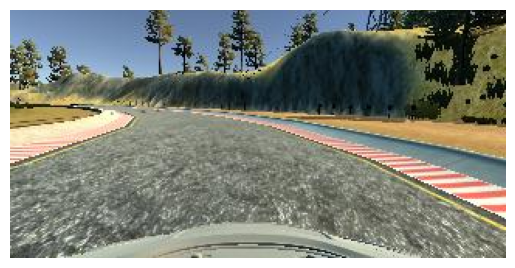

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load an input image
input_image = mpimg.imread('center_2023_11_14_20_36_51_851.jpg')


plt.imshow(input_image)
plt.axis('off')  # To hide the axis
plt.show()

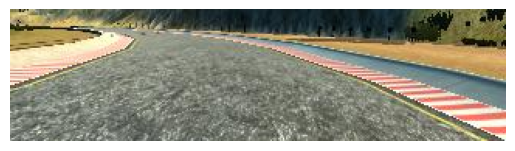

In [5]:
# Apply the randomTranslate function
translated_image = cropImage(input_image)

plt.imshow(translated_image)
plt.axis('off')  # To hide the axis
plt.show()

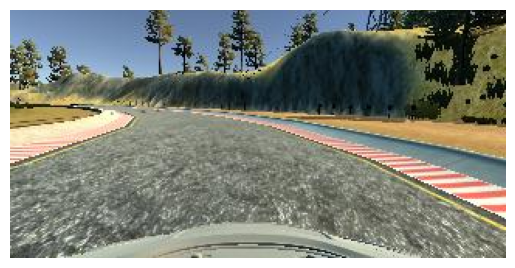

In [6]:
imageHeight, imageWidth, imageChannels = 160, 320, 3


# Apply the randomTranslate function
translated_image = resizeImage(input_image)

plt.imshow(translated_image)
plt.axis('off')  # To hide the axis
plt.show()

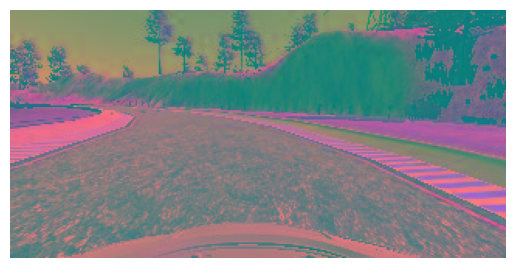

In [7]:
# Apply the randomTranslate function
translated_image = rgbToYuv(input_image)

plt.imshow(translated_image)
plt.axis('off')  # To hide the axis
plt.show()

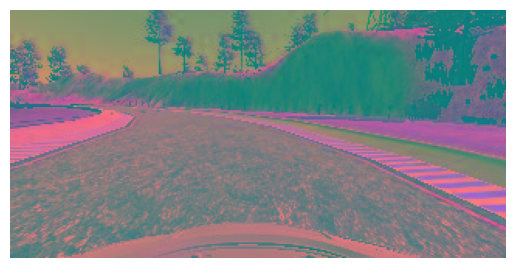

In [8]:
# Apply the randomTranslate function
translated_image_YUV = preprocess(input_image)

plt.imshow(translated_image)
plt.axis('off')  # To hide the axis
plt.show()

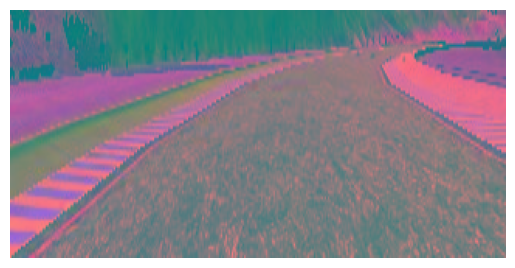

In [27]:
imageHeight, imageWidth, imageChannels = 160, 320, 3

# Apply the randomTranslate function
translated_image = randomFlip(translated_image_YUV)

plt.imshow(translated_image)
plt.axis('off')  # To hide the axis
plt.show()

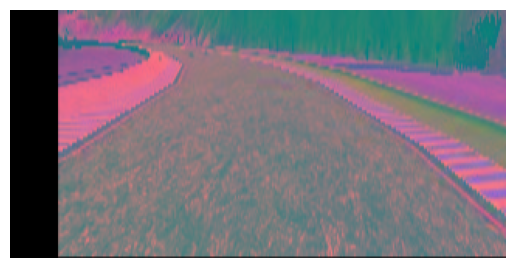

In [10]:
rangeX=100
rangeY=10

# Apply the randomTranslate function
translated_image = randomTranslate(translated_image_YUV, rangeX, rangeY)

plt.imshow(translated_image)
plt.axis('off')  # To hide the axis
plt.show()

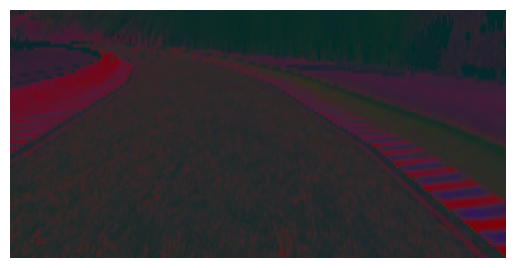

In [11]:
# Apply the randomTranslate function
translated_image = randomShadow(translated_image_YUV)

plt.imshow(translated_image)
plt.axis('off')  # To hide the axis
plt.show()

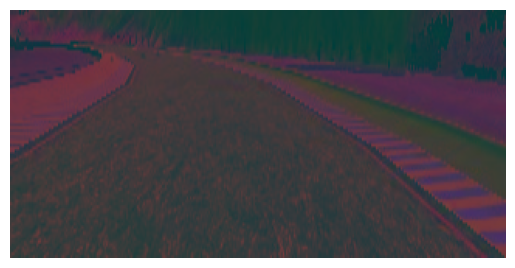

In [12]:
# Apply the randomTranslate function
translated_image = randomBrightness(translated_image_YUV)

plt.imshow(translated_image)
plt.axis('off')  # To hide the axis
plt.show()

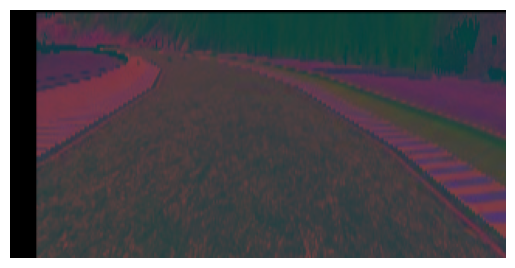

In [13]:
imageHeight, imageWidth, imageChannels = 160, 320, 3

# Apply the randomTranslate function
translated_image = augment(translated_image_YUV)

plt.imshow(translated_image)
plt.axis('off')  # To hide the axis
plt.show()

<1 Lap Less Training Data

Number of records 204


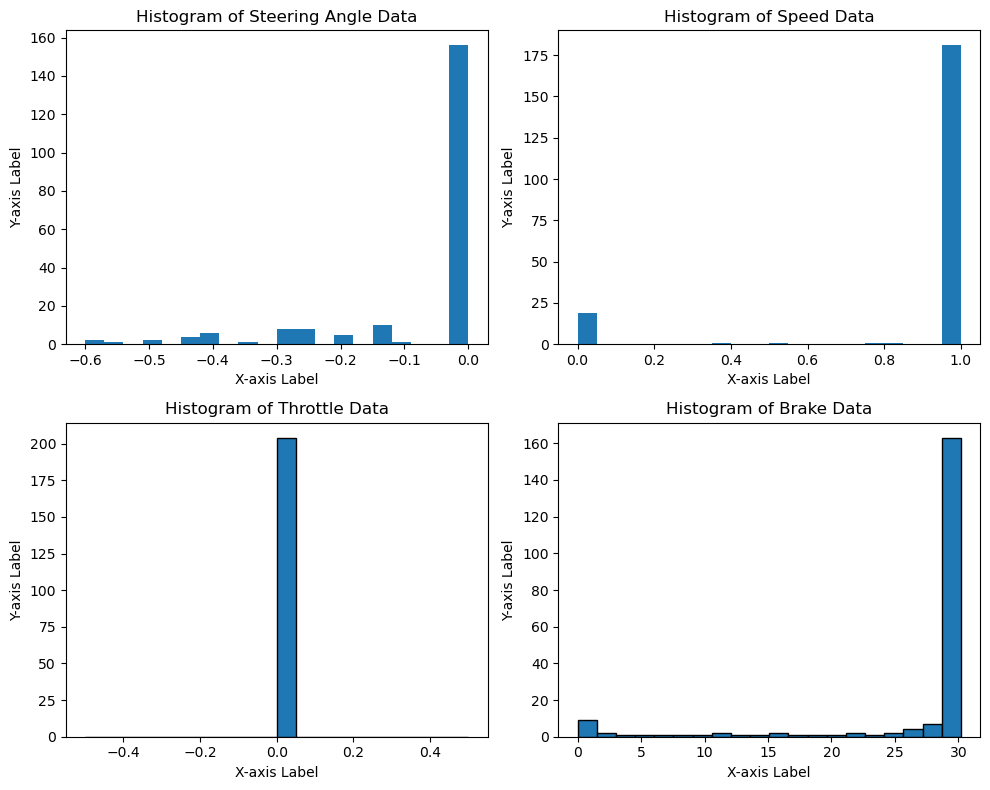

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('badData/driving_log.csv', names=["center", "left", "right", "steering angle", "speed", "throttle", "brake"])

print("Number of records", len(df))

dataSt = df['steering angle']
dataSp = df['speed']
dataThr = df['throttle']
dataBr = df['brake']

# Create a 2x2 grid for subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot the histogram for Steering Angle
axs[0, 0].hist(dataSt, bins=20)
axs[0, 0].set_title('Histogram of Steering Angle Data')
axs[0, 0].set_xlabel('X-axis Label')
axs[0, 0].set_ylabel('Y-axis Label')

# Plot the histogram for Speed
axs[0, 1].hist(dataSp, bins=20)
axs[0, 1].set_title('Histogram of Speed Data')
axs[0, 1].set_xlabel('X-axis Label')
axs[0, 1].set_ylabel('Y-axis Label')

# Plot the histogram for Throttle
axs[1, 0].hist(dataThr, bins=20, edgecolor='k')
axs[1, 0].set_title('Histogram of Throttle Data')
axs[1, 0].set_xlabel('X-axis Label')
axs[1, 0].set_ylabel('Y-axis Label')

# Plot the histogram for Brake
axs[1, 1].hist(dataBr, bins=20, edgecolor='k')
axs[1, 1].set_title('Histogram of Brake Data')
axs[1, 1].set_xlabel('X-axis Label')
axs[1, 1].set_ylabel('Y-axis Label')

# Adjust layout for better appearance
plt.tight_layout()

# Show the plots
plt.show()


In [8]:
df['throttle']

0      0
1      0
2      0
3      0
4      0
      ..
955    0
956    0
957    0
958    0
959    0
Name: throttle, Length: 960, dtype: int64

Training on Bad Data, with Deep Neural Network

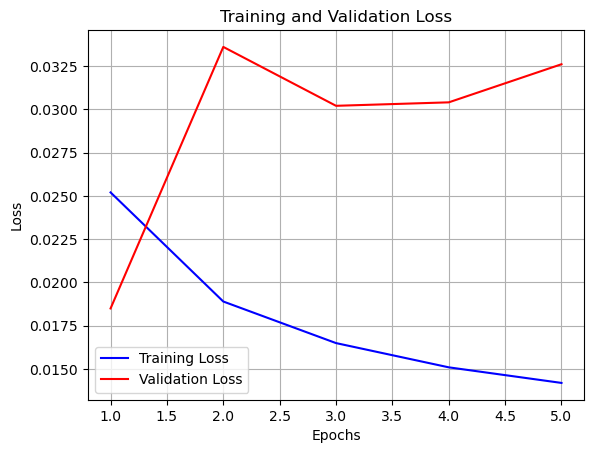

In [15]:
import matplotlib.pyplot as plt

# Define your loss and validation loss values as lists
loss = [0.0252, 0.0189, 0.0165, 0.0151, 0.0142]  # Replace with your actual values
val_loss = [0.0185, 0.0336, 0.0302, 0.0304, 0.0326]  # Replace with your actual values

# Create a list of epoch numbers
epochs = list(range(1, len(loss) + 1))

# Plot the loss and validation loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

2 to 3 laps #Good Data

Number of records 960


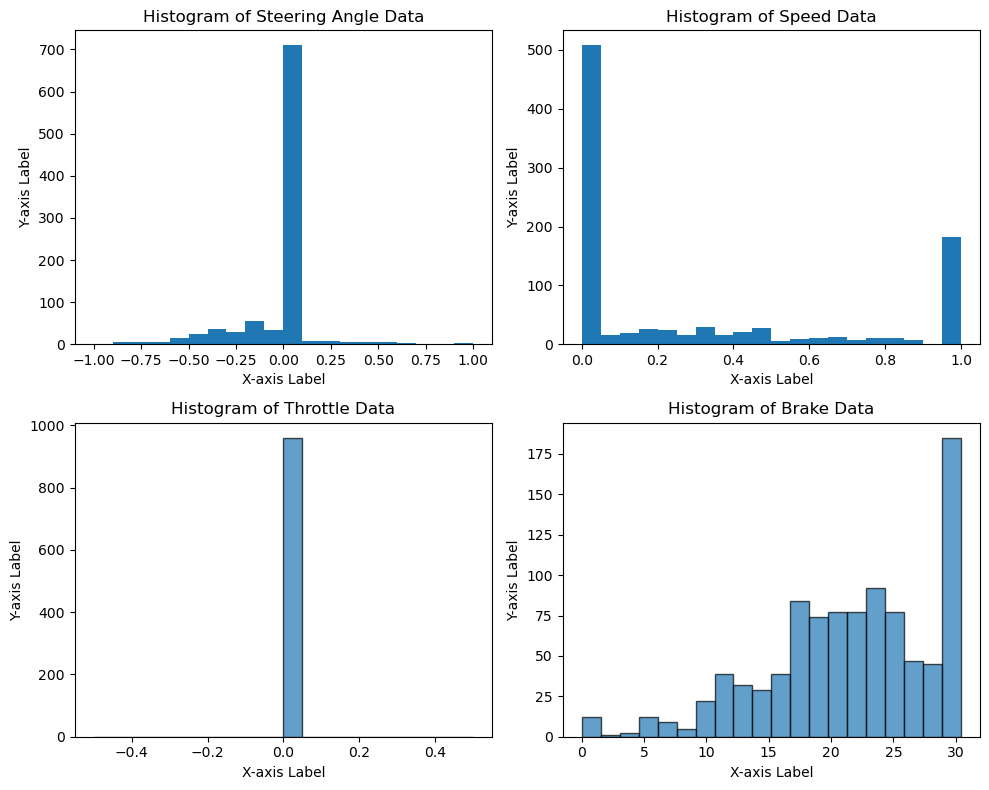

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('goodData/data/driving_log.csv', names=["center", "left", "right", "steering angle", "speed", "throttle", "brake"])

print("Number of records", len(df))

dataSt = df['steering angle']
dataSp = df['speed']
dataThr = df['throttle']
dataBr = df['brake']

# Create a 2x2 grid for subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot the histogram for Steering Angle
axs[0, 0].hist(dataSt, bins=20)
axs[0, 0].set_title('Histogram of Steering Angle Data')
axs[0, 0].set_xlabel('X-axis Label')
axs[0, 0].set_ylabel('Y-axis Label')

# Plot the histogram for Speed
axs[0, 1].hist(dataSp, bins=20)
axs[0, 1].set_title('Histogram of Speed Data')
axs[0, 1].set_xlabel('X-axis Label')
axs[0, 1].set_ylabel('Y-axis Label')

# Plot the histogram for Throttle
axs[1, 0].hist(dataThr, bins=20, edgecolor='k', alpha=0.7)
axs[1, 0].set_title('Histogram of Throttle Data')
axs[1, 0].set_xlabel('X-axis Label')
axs[1, 0].set_ylabel('Y-axis Label')

# Plot the histogram for Brake
axs[1, 1].hist(dataBr, bins=20, edgecolor='k', alpha=0.7)
axs[1, 1].set_title('Histogram of Brake Data')
axs[1, 1].set_xlabel('X-axis Label')
axs[1, 1].set_ylabel('Y-axis Label')

# Adjust layout for better appearance
plt.tight_layout()

# Show the plots
plt.show()


In [20]:
#Vanilla NN

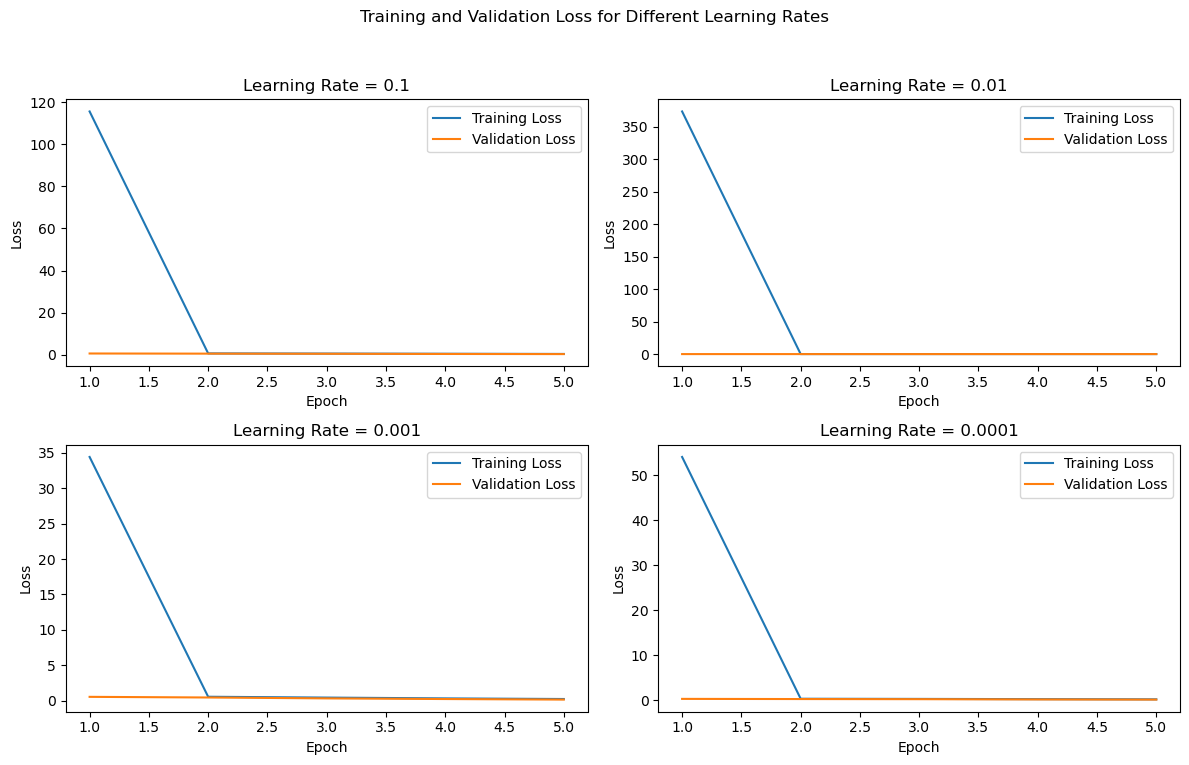

In [21]:
import matplotlib.pyplot as plt

# Define the data for each learning rate
learning_rates = [0.1, 0.01, 0.001, 0.0001]

# Training and validation losses for each learning rate
training_losses = [
    [115.5508, 0.6311, 0.5550, 0.4714, 0.3838],
    [373.7129, 0.0575, 0.0604, 0.0571, 0.0609],
    [34.4003, 0.5714, 0.4535, 0.3402, 0.2532],
    [54.0887, 0.3551, 0.3161, 0.2668, 0.2224],
]

validation_losses = [
    [0.5945, 0.5247, 0.4611, 0.3721, 0.3116],
    [0.0288, 0.0314, 0.0286, 0.0251, 0.0297],
    [0.5572, 0.4667, 0.3395, 0.2492, 0.1705],
    [0.3221, 0.2855, 0.2575, 0.1973, 0.1647],
]

# Create subplots for each learning rate
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Training and Validation Loss for Different Learning Rates')

for i, lr in enumerate(learning_rates):
    row = i // 2
    col = i % 2

    axs[row, col].plot(range(1, 6), training_losses[i], label='Training Loss')
    axs[row, col].plot(range(1, 6), validation_losses[i], label='Validation Loss')
    axs[row, col].set_title(f'Learning Rate = {lr}')
    axs[row, col].set_xlabel('Epoch')
    axs[row, col].set_ylabel('Loss')
    axs[row, col].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [22]:
#CNN

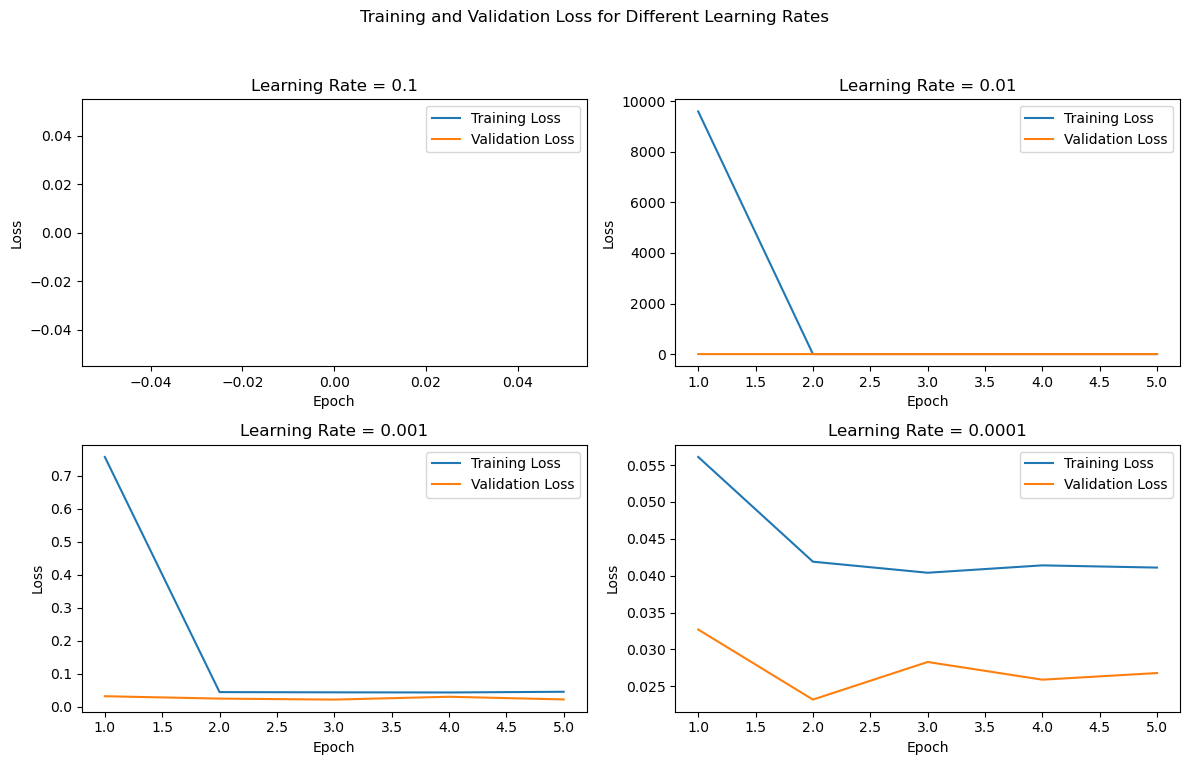

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data for each learning rate
learning_rates = [0.1, 0.01, 0.001, 0.0001]

# Training and validation losses for each learning rate
training_losses = [
    [np.nan, np.nan, np.nan, np.nan, np.nan],
    [9593.6260, 0.1689, 0.1586, 0.1510, 0.1292],
    [0.7573, 0.0445, 0.0438, 0.0434, 0.0455],
    [0.0561, 0.0419, 0.0404, 0.0414, 0.0411],
]

validation_losses = [
    [np.nan, np.nan, np.nan, np.nan, np.nan],
    [0.1710, 0.1526, 0.1334, 0.1424, 0.1163],
    [0.0320, 0.0248, 0.0218, 0.0304, 0.0223],
    [0.0327, 0.0232, 0.0283, 0.0259, 0.0268],
]

# Create subplots for each learning rate
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Training and Validation Loss for Different Learning Rates')

for i, lr in enumerate(learning_rates):
    row = i // 2
    col = i % 2

    axs[row, col].plot(range(1, 6), training_losses[i], label='Training Loss')
    axs[row, col].plot(range(1, 6), validation_losses[i], label='Validation Loss')
    axs[row, col].set_title(f'Learning Rate = {lr}')
    axs[row, col].set_xlabel('Epoch')
    axs[row, col].set_ylabel('Loss')
    axs[row, col].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
